# 📝 Exercise M7.01

This notebook aims at building baseline classifiers, which we'll use to
compare our predictive model. Besides, we will check the differences with
the baselines that we saw in regression.

We will use the adult census dataset, using only the numerical features.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
sample as a testing at each round.

In [2]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

In [4]:
cv = ShuffleSplit(test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression.

In [5]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
model = make_pipeline(StandardScaler(), LogisticRegression())

Get the test score by using the model, the data, and the cross-validation
strategy that you defined above.

In [8]:
# Write your code here.
from sklearn.model_selection import cross_validate

In [9]:
cv_result = cross_validate(model, data, target, cv=cv)

In [11]:
cv_result['test_score'].mean(), cv_result['test_score'].std()

(0.8138323573973221, 0.001978039115770915)

In [28]:
log_rgr = pd.DataFrame(cv_result['test_score'], columns=['log_rgr'])

Using the `sklearn.model_selection.permutation_test_score` function,
check the chance level of the previous model.

In [12]:
# Write your code here.
from sklearn.model_selection import permutation_test_score

In [22]:
perm_result = permutation_test_score(model, data, target, cv=cv, n_permutations=10, random_state=0)

In [31]:
perm_result

(0.8138323573973221,
 array([0.7601122 , 0.76123828, 0.76055035, 0.76139798, 0.76100078,
        0.76119324, 0.76109086, 0.76092298, 0.76154949, 0.76044388]),
 0.09090909090909091)

In [32]:
perm = pd.DataFrame(perm_result[1], columns=['perm'])

Finally, compute the test score of a dummy classifier which would predict
the most frequent class from the training set. You can look at the
`sklearn.dummy.DummyClassifier` class.

In [16]:
# Write your code here.
from sklearn.dummy import DummyClassifier

In [18]:
model_dummy = DummyClassifier(strategy='most_frequent')

In [19]:
cv_result_dummy = cross_validate(model_dummy, data, target, cv=cv)

In [20]:
cv_result_dummy['test_score'].mean()

0.7600221121166209

In [29]:
dummy_clf = pd.DataFrame(cv_result_dummy['test_score'], columns=['dummy_clf'])

Now that we collected the results from the baselines and the model, plot
the distributions of the different test scores.

We concatenate the different test score in the same pandas dataframe.

In [36]:
pd.concat?

In [50]:
# Write your code here.
res = pd.concat([log_rgr,perm,dummy_clf], axis=1)

In [51]:
res

,log_rgr,perm,dummy_clf
0,0.815937,0.760112,0.760329
1,0.813849,0.761238,0.756808
2,0.815036,0.760550,0.759142
3,0.815569,0.761398,0.760739
4,0.810982,0.761001,0.761681
5,0.814709,0.761193,0.761885
6,0.813112,0.761091,0.757463
7,0.810327,0.760923,0.757176
8,0.812416,0.761549,0.761885
9,0.816388,0.760444,0.763114


Next, plot the distributions of the test scores.

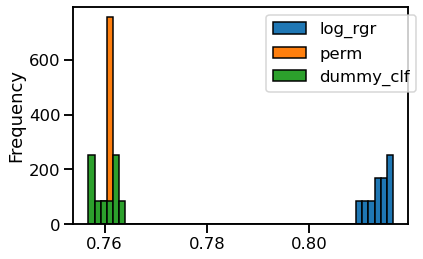

In [53]:
# Write your code here.
ax = res.plot.hist(bins=50, density=True, edgecolor="black")
ax.legend(bbox_to_anchor=(1.05,1))

Change the strategy of the dummy classifier to `stratified`, compute the
results and plot the distribution together with the other results. Explain
why the results get worse.

In [46]:
# Write your code here.
model_dummy2 = DummyClassifier(strategy='stratified')
cv_result_dummy2 = cross_validate(model_dummy2, data, target, cv=cv)
cv_result_dummy2['test_score'].mean()

0.635772490888989

In [47]:
dummy_clf2 = pd.DataFrame(cv_result_dummy2['test_score'], columns=['dummy_clf2'])

In [55]:
# Write your code here.
res = pd.concat([log_rgr,perm,dummy_clf,dummy_clf2], axis=1)

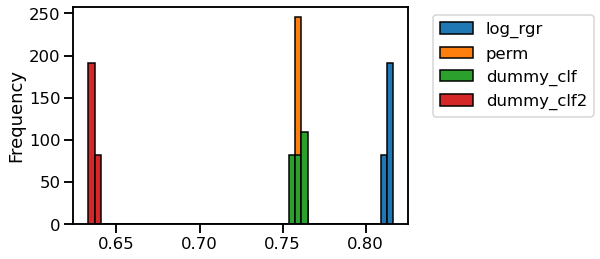

In [56]:
# Write your code here.
ax = res.plot.hist(bins=50, density=True, edgecolor="black")
ax.legend(bbox_to_anchor=(1.05,1))

We see that using strategy="stratified", the results are much worse than with the most_frequent strategy. Since the classes are imbalanced, predicting the most frequent involves that we will be right for the proportion of this class (~75% of the samples). However, by using the stratified strategy, wrong predictions will be made even for the most frequent class, hence we obtain a lower accuracy.